In [10]:
import gymnasium as gym
from gymnasium import spaces

# PyTorch imports
import torch
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical
if torch.cuda.is_available():
  device = "cuda" 
else:
  device = "cpu"
device_ = torch.device(device)
print(device, " in use")
torch.autograd.set_detect_anomaly(True)

# Utility librarues
import base64, io
import random
import pickle
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
from itertools import count

is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

torch.cuda.get_device_name(0)

obs_space = 8
action_space = 4

cuda  in use


In [11]:
class Actor_net(nn.Module):
    def __init__(self):
        super(Actor_net, self).__init__()
        self.layer1 = nn.Linear(obs_space, 128)
        self.hidden = nn.Linear(128, 128)
        self.out = nn.Linear(128, action_space) # action probabilities

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.hidden(x))
        action_prob = F.softmax(self.out(x), dim= -1) # softmax
        return action_prob

In [12]:
class Critic_net(nn.Module):
    def __init__(self):
        super(Critic_net, self).__init__()
        self.layer1 = nn.Linear(obs_space + 1, 128)
        self.hidden = nn.Linear(128, 128)
        self.out = nn.Linear(128, 1) # action probabilities

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.hidden(x))
        Q_val = self.out(x)
        return Q_val

In [13]:
Actor = Actor_net().to(device)
Critic = Critic_net().to(device)

Actor_lr = 0.0001
Actor_optim = optim.SGD(Actor.parameters(), lr = Actor_lr)
Qsa_lr = 0.0001
Critic_optim = optim.SGD(Critic.parameters(), lr = Qsa_lr)

In [18]:
def load():
    PATH = "LunarLander_Actor_QAC.pth"
    Actor.load_state_dict(torch.load(PATH))

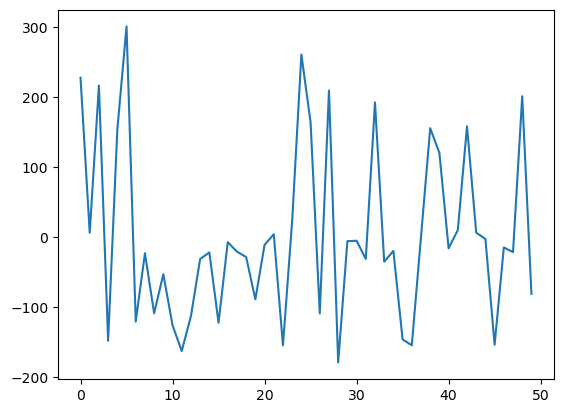

In [26]:
import time
# There. we finished
# Lets see it in action
done = False
cnt = 0

env = gym.make('LunarLander-v2')#, render_mode="human")

observation, info = env.reset()

reward_arr_eval = []

for i in range(50):
    load()
    observation, info = env.reset()
    done = False
    cnt = 0
    reward_ = 0
    itr = 0
    while True:
        itr += 1
        if itr == 1000:
            break
        #env.render()
        a_prob = Actor(torch.tensor(observation).float().to(device))
        action = np.argmax(a_prob.detach().cpu().numpy())
        observation, reward, done, _, _ = env.step(action)
        # Lets see how long it lasts until failing
        reward_ += reward
        if done:
            break
    reward_arr_eval.append(reward_)
    #print(f"Game lasted {cnt} moves")

    #time.sleep(100)
    #print(i)
    if i == 50:
        break
env.close()
plt.plot(reward_arr_eval)
